<a href="https://colab.research.google.com/github/Pandya16/Datasets1/blob/main/Identify_your_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
!unzip Train_UQcUa52.zip

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/55.png     
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   

In [ ]:
df=pd.read_csv("train.csv")
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [ ]:
X=np.array([img_to_array(load_img('Images/train/'+df['filename'][i], target_size=(28, 28, 1), grayscale=True))
            for i in tqdm(range(len(df)))
            ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


7


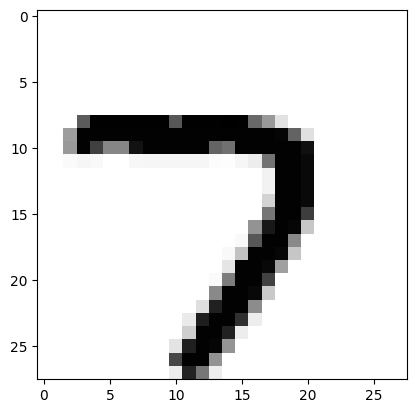

In [ ]:
image_index=50
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28), cmap='Greys')

In [ ]:
y=df['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

In [ ]:
x_train/=255
x_test/=255

In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1149/1149 [==============================] - 16s 13ms/step - loss: 0.2770 - accuracy: 0.9170 - val_loss: 0.1194 - val_accuracy: 0.9638
Epoch 2/30
1149/1149 [==============================] - 14s 12ms/step - loss: 0.1237 - accuracy: 0.9619 - val_loss: 0.0821 - val_accuracy: 0.9736
Epoch 3/30
1149/1149 [==============================] - 14s 13ms/step - loss: 0.0878 - accuracy: 0.9727 - val_loss: 0.0836 - val_accuracy: 0.9740
Epoch 4/30
1149/1149 [==============================] - 16s 14ms/step - loss: 0.0666 - accuracy: 0.9782 - val_loss: 0.0802 - val_accuracy: 0.9769
Epoch 5/30
1149/1149 [==============================] - 15s 13ms/step - loss: 0.0586 - accuracy: 0.9811 - val_loss: 0.0696 - val_accuracy: 0.9799
Epoch 6/30
1149/1149 [==============================] - 18s 16ms/step - loss: 0.0475 - accuracy: 0.9833 - val_loss: 0.0673 - val_accuracy: 0.9804
Epoch 7/30
1149/1149 [==============================] - 15s 13ms/step - loss: 0.0394 - accuracy: 0.9870 - val_loss: 0.0702 -

1/1 [==============================] - 0s 15ms/step
Predicted Output:  7


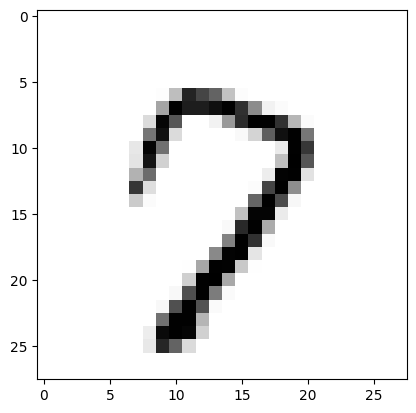

In [ ]:
image_index=16
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred=model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Predicted Output: ', pred.argmax())